# TSF Task 2: To Explore Supervised Machine Learning 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. \
This is a simple linear regression task since it involves just two variables.\
### Data can be found at http://bit.ly/w-data
#### What will be predicted score if a student study for 9.25 hrs in a day ?

In [1]:

print('Nemil Shah')

Nemil Shah


In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
student_scores = pd.read_csv(url)
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
student_scores.isna().sum()

Hours     0
Scores    0
dtype: int64

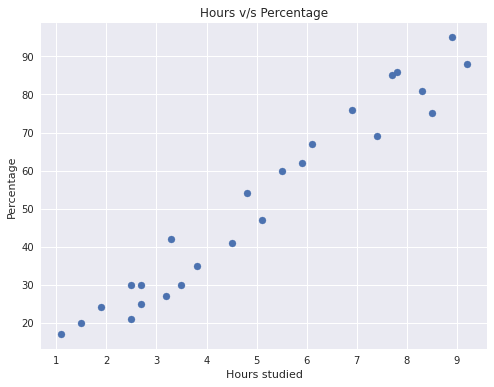

In [7]:
# Plotting the distribution of scores
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x = student_scores["Hours"], y = student_scores["Scores"])
ax.set(title="Hours v/s Percentage", xlabel="Hours studied", ylabel="Percentage");

#### We observe that there is a linear relation between the hours studied and the percentage received.

## Preparing the data. 

In [8]:
X = student_scores.iloc[:,:-1]
y = student_scores.iloc[:,-1]

In [9]:
# Setting random seed to get fixed results for a particular value.
np.random.seed(42)

# Splitting the data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)


## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.


In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
print("Training Complete !")

Training Complete !


## Plotting the regression line
Since we have trained the model, we'll plot the regression line.

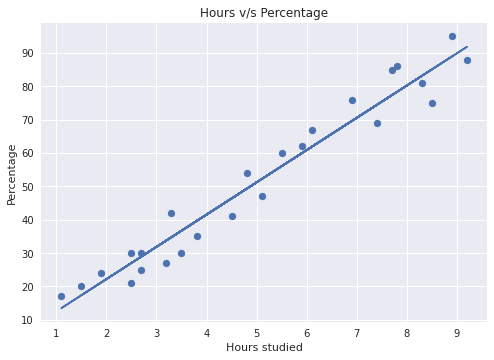

In [11]:
line = regressor.coef_*X + regressor.intercept_

# Plotting the distribution of scores
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.scatter(x = student_scores["Hours"], y = student_scores["Scores"])
ax.set(title="Hours v/s Percentage", xlabel="Hours studied", ylabel="Percentage");

# Plotting the regression line.
plt.plot(X, line);

In [12]:
# Creating a dataframe of actual and predicted values
y_preds = regressor.predict(X_test)

df = pd.DataFrame({"Actual": y_test, "Predicted": y_preds})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [13]:
# Finally making our own predictions
final_preds = regressor.predict([[9.25]])
print(f"After studying for 9.25 hours,the expected score is {final_preds}")

After studying for 9.25 hours,the expected score is [92.38611528]


# Evaluating the model

The final step is to evaluate the performance of algorithm. \
This step is particularly important to compare how well different algorithms perform on a particular dataset.

We chose Mean Absolute error to measure performance of our model.

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

error = mean_absolute_error(y_test, y_preds)
print(f"The mean absolute error is: {mean_absolute_error(y_test, y_preds)}")
print(f"The mean squared error is: {mean_squared_error(y_test, y_preds)}")
print(f"The R2 score is: {r2_score(y_test, y_preds)}")

The mean absolute error is: 3.920751190209927
The mean squared error is: 18.943211722315265
The R2 score is: 0.9678055545167994
